# American Style convertible bond

This section considers a case where the firm issuing the bond contract looks to embed further american style options into the contract. The holder can now convert the bond to stock at any time before the maturity of the contract. This results an an american stle condition giving the inequality:
$ V >= RS $

In [28]:
import csv

S = []
V = []
V_callremoved = []
V_normal = []

with open('Ameribond1.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        S.append(float(row[0]))
        V.append(float(row[1]))
        
with open('Ameribond_callremoved.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        V_callremoved.append(float(row[1]))

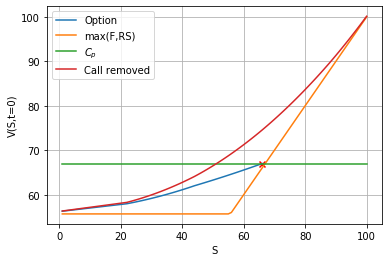

In [30]:
import numpy as np
import matplotlib.pyplot as plt
Bond_floor = np.ones(len(S)) * 56
Equity_part = []
CALL = []
import scipy.stats as si
C = 0.106
alpha = 0.01
r = 0.0038
T = 3
F = 56
R = 1
sigma = 0.369
#WHY HAS HE ADDED .47 to X?
K = 56.47
S0 = K

COUPON = C* (1- np.exp((-(alpha+r)*T)))/(alpha+r) 

BOND = F*np.exp(-r*T)

S_adap = []
V_adap = []
for i in range(len(S)):
    Equity_part.append(max(S[i], COUPON+BOND))
    CALL.append(67)
for i in range(66):
    S_adap.append(i+1)
    V_adap.append(V[i])
    
#plt.plot(S,V, label = "Option")
plt.plot(S_adap,V_adap, label = "Option")

#plt.plot(S,V_normal, label = " Without embeedded call option")
plt.plot(S,Equity_part, label  = "max(F,RS)")
plt.plot(S,CALL, label = "$C_{p}$")
plt.plot(S,V_callremoved, label = "Call removed")
plt.xlabel("S")
plt.scatter(66,67, marker = 'x', color = 'red')
plt.ylabel('V(S,t=0)')
#plt.xlim([60,70])
#plt.ylim([66,68])
plt.legend()
plt.grid()
plt.show()

In [14]:
#Want to just plot 60 - 70
V_adapted = []
S_adapted = []
for i in range(len(S)):
    if S[i] > 60 and S[i] < 70:
        S_adapted.append(S[i])
        V_adapted.append(V[i])


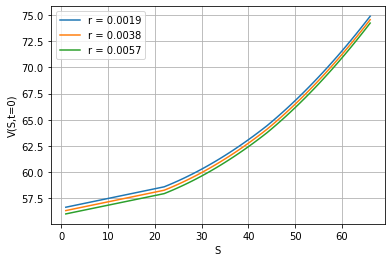

In [15]:
rlow = []
rmed = []
rhigh = []
S = []
with open('Ameribond_r.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        S.append(float(row[0]))
        rlow.append(float(row[1]))
        rmed.append(float(row[2]))
        rhigh.append(float(row[3]))

plt.plot(S,rlow, label = "r = 0.0019")
plt.plot(S,rmed, label = "r = 0.0038")
plt.plot(S,rhigh, label = "r = 0.0057")
#plt.xlim([60,70])
#plt.ylim([66,68])
plt.legend()
plt.xlabel("S")
plt.ylabel('V(S,t=0)')
plt.grid()
plt.show()